### Step1 : Import Libraries:
        

   We  need few libraries to perform, pandas and numpy for data wrangling,matplotlib for visualization and sklearn for importing KNN algorithm

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### step 2: Data Preparation

In [3]:
mydata =sns.load_dataset('iris')
mydata.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#### Check datatypes:


In [5]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### Check null values:

In [7]:
mydata.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

##### Check correlation

In [9]:
mydata.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


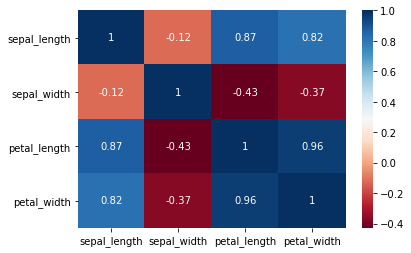

In [11]:
sns.heatmap(mydata.corr(),annot = True, cmap = 'RdBu')

#### Visualize two variables for modeling

In [4]:
mydata_col = mydata[['sepal_length','sepal_width']]

### scatter plot 

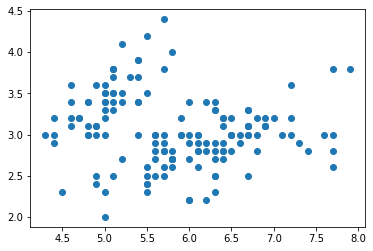

In [13]:
plt.scatter(mydata['sepal_length'],mydata['sepal_width'])

#### Convert columns into array

In [15]:
x = mydata_col.values
x

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1],
       [5.4, 3.7],
       [4.8, 3.4],
       [4.8, 3. ],
       [4.3, 3. ],
       [5.8, 4. ],
       [5.7, 4.4],
       [5.4, 3.9],
       [5.1, 3.5],
       [5.7, 3.8],
       [5.1, 3.8],
       [5.4, 3.4],
       [5.1, 3.7],
       [4.6, 3.6],
       [5.1, 3.3],
       [4.8, 3.4],
       [5. , 3. ],
       [5. , 3.4],
       [5.2, 3.5],
       [5.2, 3.4],
       [4.7, 3.2],
       [4.8, 3.1],
       [5.4, 3.4],
       [5.2, 4.1],
       [5.5, 4.2],
       [4.9, 3.1],
       [5. , 3.2],
       [5.5, 3.5],
       [4.9, 3.6],
       [4.4, 3. ],
       [5.1, 3.4],
       [5. , 3.5],
       [4.5, 2.3],
       [4.4, 3.2],
       [5. , 3.5],
       [5.1, 3.8],
       [4.8, 3. ],
       [5.1, 3.8],
       [4.6, 3.2],
       [5.3, 3.7],
       [5. , 3.3],
       [7. , 3.2],
       [6.4, 3.2],
       [6.9,

# Step:3 Modelling
Like most machine learning implementation,actual modeling takes very little effort. First,instantiate the model with the parameters youselected and then fit the model to your data.That's it!The key parameter in kNN in_neighbors,which
determines the number of neighbors to use for calculating distances from the point of measurement.


In [16]:
from sklearn.neighbors import NearestNeighbors

In [64]:
model = NearestNeighbors(n_neighbors = 3)
model.fit(x)

NearestNeighbors(n_neighbors=3)

# Step 4: Anomaly detection:
Now that we have fitted the model, it's time to extract model outputs-
(a) distances between data points and 
(b) associated index values that can be used for detecting anomalies.

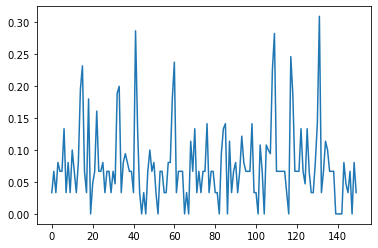

In [23]:
distances,indexes = model.kneighbors(x)
plt.plot(distances.mean(axis = 1))

# plot the average distances  of each observation:

### we can see, there are some spikes in distance measures, and these spikes are potentially anomalies or outliers in the dataset.Now comes one of the most important decisions for data scientists - determining the cutoff value to filter anomalies.As we see in the figure above, some cutoff possibilities are - 0.25, 0.20, 0.15 (y-axis), each filtering a progressively higher number of outliers. For this demo, let's be generous and choose 0.15 as the cutoff to get more outliers. The reason for being generous is to be able to further examinethe data so we are not missing outlier.

### Visualize determine cut_off values >0.15

In [25]:

outlier = np.where(distances.mean(axis = 1) > 0.15)
outlier

(array([ 14,  15,  18,  22,  32,  33,  41,  59,  60, 108, 109, 117, 118,
        131]),)

### Filter outlier values

In [65]:
mydata_filtered = mydata.iloc[outlier]
mydata_filtered.head()


,sepal_length,sepal_width,petal_length,petal_width,species
14,5.8,4.0,1.2,0.2,setosa
15,5.7,4.4,1.5,0.4,setosa
18,5.7,3.8,1.7,0.3,setosa
22,4.6,3.6,1.0,0.2,setosa
32,5.2,4.1,1.5,0.1,setosa


## Plotting anomalies:

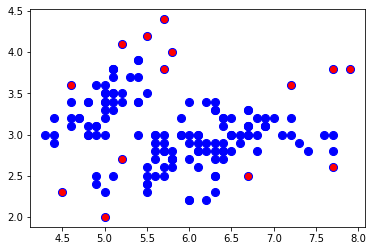

In [31]:
#plot Data
plt.scatter(mydata['sepal_length'],mydata['sepal_width'],color = 'b',s =65)
#plot outlier values:
plt.scatter(mydata_filtered['sepal_length'],mydata_filtered['sepal_width'],color = 'r')

### Model building using KNN to predict accuracy

In [33]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

In [34]:
mydata_filtered["species"]=LE.fit_transform(mydata_filtered.species)

<ipython-input-34-3cc25ca3e265>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mydata_filtered["species"]=LE.fit_transform(mydata_filtered.species)


In [42]:
y_dep = mydata_filtered["species"]
y_dep
len(y_dep)

14

In [37]:
x_ind = mydata_filtered.drop("species",axis = 1)
x_ind 

,sepal_length,sepal_width,petal_length,petal_width
14,5.8,4.0,1.2,0.2
15,5.7,4.4,1.5,0.4
18,5.7,3.8,1.7,0.3
22,4.6,3.6,1.0,0.2
32,5.2,4.1,1.5,0.1
33,5.5,4.2,1.4,0.2
41,4.5,2.3,1.3,0.3
59,5.2,2.7,3.9,1.4
60,5.0,2.0,3.5,1.0
108,6.7,2.5,5.8,1.8


In [52]:
x_ind = x_ind.reset_index()
x_ind

,level_0,index,sepal_length,sepal_width,petal_length,petal_width
0,0,14,5.8,4.0,1.2,0.2
1,1,15,5.7,4.4,1.5,0.4
2,2,18,5.7,3.8,1.7,0.3
3,3,22,4.6,3.6,1.0,0.2
4,4,32,5.2,4.1,1.5,0.1
5,5,33,5.5,4.2,1.4,0.2
6,6,41,4.5,2.3,1.3,0.3
7,7,59,5.2,2.7,3.9,1.4
8,8,60,5.0,2.0,3.5,1.0
9,9,108,6.7,2.5,5.8,1.8


In [53]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x_ind,y_dep,train_size= 0.8,random_state = 2)
from sklearn.neighbors import KNeighborsClassifier

In [54]:
x_ind.shape

(14, 6)

In [55]:
y_dep.shape

(14,)

In [56]:
np.sqrt(14)

3.7416573867739413

In [57]:
knn =KNeighborsClassifier(n_neighbors = 5, p=3,metric ='euclidean')

In [58]:
knn.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean', p=3)

In [59]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [60]:
y_pred=knn.predict(x_test)
y_pred

array([2, 0, 0])

In [61]:
accuracy_score(y_test,y_pred)

1.0

# Conclusion:
   Thus by using KNN anomaly detection method, we have removed all outlier.After removing outlier our accuracy is 100%.
    